In [1]:
#Importing required libraries

#import imblearn
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
from keras.layers import Dense 
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
# Import EarlyStopping
from keras.callbacks import EarlyStopping


In [2]:
# Copy train dataset into dataframe

train_data_file = '/Users/mackbookair/Desktop/Git/CapStone/CapstoneProject/TestData/allstate-purchase-prediction-challenge-datawargling/train.csv'
train_df = pd.read_csv(train_data_file)
train_df.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [3]:
train_df.describe()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,6.652490e+05,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,424831.000000,665249.000000,...,646538.000000,646538.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000
mean,1.007655e+07,4.219966,0.145824,1.969429,12271.543022,1.234784,0.536229,8.139437,2.563996,44.992403,...,2.444718,6.003774,0.927546,0.454236,2.275265,2.454299,0.445193,1.162768,2.275120,635.785008
std,4.404978e+04,2.394369,0.352930,1.453470,1564.789415,0.461036,0.498686,5.764598,1.111584,17.403440,...,1.034596,4.680793,0.595221,0.497902,0.990798,0.753953,0.496987,0.943594,0.909567,45.993758
min,1.000000e+07,1.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003852e+07,2.000000,0.000000,1.000000,10936.000000,1.000000,0.000000,3.000000,2.000000,28.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,605.000000
50%,1.007640e+07,4.000000,0.000000,2.000000,12027.000000,1.000000,1.000000,7.000000,3.000000,44.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,635.000000
75%,1.011470e+07,6.000000,0.000000,3.000000,13426.000000,1.000000,1.000000,12.000000,4.000000,60.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,665.000000
max,1.015272e+07,13.000000,1.000000,6.000000,16580.000000,4.000000,1.000000,85.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,922.000000


In [4]:
train_df.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'time', 'state',
       'location', 'group_size', 'homeowner', 'car_age', 'car_value',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'cost'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

Observations:

1. Total 665,249 records

2. 25 columns

3. Different data types -   
    a. time is identified as object      
    b. state and car_value are other columns which are also identified as objects   
    c. risk_factor, C_previous and duration_previous are identified as float  
    d. all other columns are identified as int  
    
4. Following columns have Null values -
    car_value, 
    risk_factor, 
    C_previous, 
    duration_previous
    
5. column name 'customer_ID' is inconsistent

6. Missing values:     
    a. 240,418 records does not have value for risk_factor, which approximates to 36% of total records  
    b. 1,531 records does not have value for car_value, which approximates to 0.23% of total records  
    c. 18,711 records does not have value for C_previous, which approximates to 2.81% of total records   
    d. 18,711 records does not have value for duration_previous, which approximates to 2.81% of total records

Lot of records does not have a value for risk_factor. 

In [6]:
# Chekcing for unique values in risk_factor
train_df.risk_factor.unique()

array([ 3.,  4., nan,  2.,  1.])

In [7]:
# Checking for number of records for each distinct value
train_df['risk_factor'].value_counts()

3.0    117571
4.0    110754
1.0     99476
2.0     97030
Name: risk_factor, dtype: int64

In [8]:
# Caliculating mean of the column
risk_factor_mean = round(train_df['risk_factor'].mean())
risk_factor_mean

3

In [9]:
# Replacing na values with the mean value 
train_df['risk_factor']=train_df['risk_factor'].fillna(round((train_df['risk_factor'].mean())))
train_df['risk_factor'].value_counts()

3.0    357989
4.0    110754
1.0     99476
2.0     97030
Name: risk_factor, dtype: int64

In [10]:
train_df.risk_factor.unique()

array([3., 4., 2., 1.])

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        665249 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [12]:
# Droping rest of records having nan values
train_df = train_df.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        645648 non-null  int64  
 1   shopping_pt        645648 non-null  int64  
 2   record_type        645648 non-null  int64  
 3   day                645648 non-null  int64  
 4   time               645648 non-null  object 
 5   state              645648 non-null  object 
 6   location           645648 non-null  int64  
 7   group_size         645648 non-null  int64  
 8   homeowner          645648 non-null  int64  
 9   car_age            645648 non-null  int64  
 10  car_value          645648 non-null  object 
 11  risk_factor        645648 non-null  float64
 12  age_oldest         645648 non-null  int64  
 13  age_youngest       645648 non-null  int64  
 14  married_couple     645648 non-null  int64  
 15  C_previous         645648 non-null  float64
 16  du

We have 645,648 out of 665,249 total records, we droped around 3% of records which have nan value.

In [13]:
#Renaming column names - converting uppercase names to lower case
train_df.rename(columns={'customer_ID':'customer_id','C_previous':'c_previous','A':'a','B':'b','C':'c','D':'d','E':'e','F':'f','G':'g'},inplace = True)

train_df.columns

Index(['customer_id', 'shopping_pt', 'record_type', 'day', 'time', 'state',
       'location', 'group_size', 'homeowner', 'car_age', 'car_value',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'c_previous', 'duration_previous', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'cost'],
      dtype='object')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        645648 non-null  int64  
 1   shopping_pt        645648 non-null  int64  
 2   record_type        645648 non-null  int64  
 3   day                645648 non-null  int64  
 4   time               645648 non-null  object 
 5   state              645648 non-null  object 
 6   location           645648 non-null  int64  
 7   group_size         645648 non-null  int64  
 8   homeowner          645648 non-null  int64  
 9   car_age            645648 non-null  int64  
 10  car_value          645648 non-null  object 
 11  risk_factor        645648 non-null  float64
 12  age_oldest         645648 non-null  int64  
 13  age_youngest       645648 non-null  int64  
 14  married_couple     645648 non-null  int64  
 15  c_previous         645648 non-null  float64
 16  du

In [15]:
train_df.time.unique()

array(['08:35', '08:38', '08:39', ..., '00:13', '00:16', '00:40'],
      dtype=object)

In [16]:
# dropping time column
train_df = train_df.drop('time',axis=1)
train_df.columns

Index(['customer_id', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'c_previous',
       'duration_previous', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'cost'],
      dtype='object')

In [17]:
train_df.customer_id.unique()

array([10000000, 10000005, 10000007, ..., 10152721, 10152723, 10152724])

In [18]:
# dropping customer_id column
train_df = train_df.drop('customer_id',axis=1)
train_df.columns

Index(['shopping_pt', 'record_type', 'day', 'state', 'location', 'group_size',
       'homeowner', 'car_age', 'car_value', 'risk_factor', 'age_oldest',
       'age_youngest', 'married_couple', 'c_previous', 'duration_previous',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'cost'],
      dtype='object')

In [19]:
train_df.day.unique()

array([0, 3, 4, 2, 1, 5, 6])

In [20]:
train_df['day'].value_counts()

0    136441
1    132807
2    129654
4    119937
3    117781
5      8088
6       940
Name: day, dtype: int64

In [21]:
train_df['day'][train_df.record_type==0].value_counts()

0    118009
1    113738
2    110982
3     99980
4     99273
5      6672
6       821
Name: day, dtype: int64

In [22]:
# dropping day column
train_df = train_df.drop('day',axis=1)
train_df.columns

Index(['shopping_pt', 'record_type', 'state', 'location', 'group_size',
       'homeowner', 'car_age', 'car_value', 'risk_factor', 'age_oldest',
       'age_youngest', 'married_couple', 'c_previous', 'duration_previous',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'cost'],
      dtype='object')

In [23]:
# dropping day column
#train_df = train_df.drop('shopping_pt',axis=1)
#train_df.columns

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shopping_pt        645648 non-null  int64  
 1   record_type        645648 non-null  int64  
 2   state              645648 non-null  object 
 3   location           645648 non-null  int64  
 4   group_size         645648 non-null  int64  
 5   homeowner          645648 non-null  int64  
 6   car_age            645648 non-null  int64  
 7   car_value          645648 non-null  object 
 8   risk_factor        645648 non-null  float64
 9   age_oldest         645648 non-null  int64  
 10  age_youngest       645648 non-null  int64  
 11  married_couple     645648 non-null  int64  
 12  c_previous         645648 non-null  float64
 13  duration_previous  645648 non-null  float64
 14  a                  645648 non-null  int64  
 15  b                  645648 non-null  int64  
 16  c 

Inspecting columns with type as float64

In [25]:
train_df.risk_factor.unique()

array([3., 4., 2., 1.])

In [26]:
# Convert risk_factor column to int type
train_df['risk_factor']=train_df['risk_factor'].astype('int')
train_df.risk_factor.unique()

array([3, 4, 2, 1])

In [27]:
train_df.c_previous.unique()

array([1., 3., 2., 4.])

In [28]:
# Convert c_previous column to int type
train_df['c_previous']=train_df['c_previous'].astype('int')
train_df.c_previous.unique()

array([1, 3, 2, 4])

In [29]:
 train_df.duration_previous.unique()

array([ 2., 13.,  4.,  3.,  9.,  0.,  1.,  8., 14.,  5., 15.,  6.,  7.,
       11., 10., 12.])

In [30]:
# Convert duration_previous column to int type
train_df['duration_previous']=train_df['duration_previous'].astype('int')
train_df.duration_previous.unique()

array([ 2, 13,  4,  3,  9,  0,  1,  8, 14,  5, 15,  6,  7, 11, 10, 12])

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   shopping_pt        645648 non-null  int64 
 1   record_type        645648 non-null  int64 
 2   state              645648 non-null  object
 3   location           645648 non-null  int64 
 4   group_size         645648 non-null  int64 
 5   homeowner          645648 non-null  int64 
 6   car_age            645648 non-null  int64 
 7   car_value          645648 non-null  object
 8   risk_factor        645648 non-null  int64 
 9   age_oldest         645648 non-null  int64 
 10  age_youngest       645648 non-null  int64 
 11  married_couple     645648 non-null  int64 
 12  c_previous         645648 non-null  int64 
 13  duration_previous  645648 non-null  int64 
 14  a                  645648 non-null  int64 
 15  b                  645648 non-null  int64 
 16  c                  6

In [32]:
train_df.head()

,shopping_pt,record_type,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,...,c_previous,duration_previous,a,b,c,d,e,f,g,cost
0,1,0,IN,10001,2,0,2,g,3,46,...,1,2,1,0,2,2,1,2,2,633
1,2,0,IN,10001,2,0,2,g,3,46,...,1,2,1,0,2,2,1,2,1,630
2,3,0,IN,10001,2,0,2,g,3,46,...,1,2,1,0,2,2,1,2,1,630
3,4,0,IN,10001,2,0,2,g,3,46,...,1,2,1,0,2,2,1,2,1,630
4,5,0,IN,10001,2,0,2,g,3,46,...,1,2,1,0,2,2,1,2,1,630


In [33]:
train_df.state.unique()

array(['IN', 'NY', 'PA', 'WV', 'MO', 'OH', 'OK', 'FL', 'OR', 'WA', 'KS',
       'NV', 'ID', 'CO', 'CT', 'AL', 'AR', 'NM', 'MS', 'MD', 'RI', 'ME',
       'TN', 'UT', 'WI', 'MT', 'KY', 'WY', 'NE', 'ND', 'DE', 'GA', 'NH',
       'IA', 'DC', 'SD'], dtype=object)

In [34]:
train_df['state'].value_counts()

FL    104988
NY     89589
PA     59049
OH     43417
MD     27957
WA     24537
IN     23891
CO     23260
AL     22972
CT     18847
TN     17537
KY     15589
NV     15092
MO     14759
OR     14207
UT     14167
OK     13526
MS     10258
AR     10223
WI      9954
GA      8484
NH      7312
NM      6676
ME      6370
ID      5873
RI      5711
KS      5490
WV      4989
IA      4436
DE      3996
DC      3271
MT      3110
NE      3087
ND      1454
WY      1133
SD       437
Name: state, dtype: int64

In [35]:
train_df['state'][train_df.record_type==1].value_counts()

FL    14599
NY    13574
PA     8900
OH     6641
MD     4218
IN     3639
AL     3578
WA     3561
CO     3516
CT     2813
TN     2635
KY     2348
MO     2193
OR     2138
NV     2119
UT     2069
OK     2018
AR     1561
MS     1557
WI     1544
GA     1254
NH     1091
ME     1002
NM      999
ID      885
RI      873
KS      858
WV      779
IA      686
DE      595
DC      502
NE      490
MT      461
ND      240
WY      166
SD       71
Name: state, dtype: int64

In [36]:
train_df.location.unique()

array([10001, 10006, 10008, ..., 16579, 16562, 16580])

In [37]:
train_df['location'].value_counts()

10083    1027
10213     974
11517     864
10348     860
10030     782
         ... 
16299       1
16166       1
16026       1
16140       1
16405       1
Name: location, Length: 6244, dtype: int64

In [38]:
train_df['group_size'].value_counts()

1    503170
2    133112
3      8686
4       680
Name: group_size, dtype: int64

In [39]:
train_df['group_size'][train_df.record_type==1].value_counts()

1    74924
2    19865
3     1274
4      110
Name: group_size, dtype: int64

In [40]:
train_df['homeowner'].value_counts()

1    348357
0    297291
Name: homeowner, dtype: int64

In [41]:
train_df['homeowner'][train_df.record_type==1].value_counts()

1    52620
0    43553
Name: homeowner, dtype: int64

In [42]:
train_df['car_age'].value_counts()

1     69635
2     49355
7     45681
6     43408
8     43217
      ...  
65        5
51        5
60        4
85        4
54        1
Name: car_age, Length: 67, dtype: int64

In [43]:
train_df['car_age'][train_df.record_type==1].value_counts()

1     10290
2      7292
7      6772
8      6424
6      6399
      ...  
55        1
57        1
58        1
65        1
60        1
Name: car_age, Length: 65, dtype: int64

In [44]:
train_df['car_value'].value_counts()

e    213495
f    172456
d    109861
g     95497
h     28224
c     20179
i      3520
b      1342
a      1074
Name: car_value, dtype: int64

In [45]:
train_df['car_value'][train_df.record_type==1].value_counts()

e    31884
f    25725
d    16252
g    14283
h     4126
c     3027
i      500
b      206
a      170
Name: car_value, dtype: int64

In [46]:
train_df['age_oldest'].value_counts()

75    44133
24    20875
23    20751
25    20617
22    18930
26    18121
27    15494
28    14751
21    13686
29    12771
30    12371
31    11636
32    11279
33    11079
43    11039
55    10842
42    10747
52    10686
34    10658
53    10490
46    10458
35    10385
56    10380
49    10308
54    10283
48    10268
58    10211
51    10130
50     9983
59     9908
45     9860
44     9839
41     9815
20     9700
36     9656
57     9615
47     9589
37     9532
66     9518
65     9455
63     9444
38     9440
60     9417
40     9321
61     9257
39     9192
62     9149
64     9076
70     8092
69     7458
67     7391
68     6819
71     6738
19     6210
72     6055
73     5724
74     5551
18     1465
Name: age_oldest, dtype: int64

In [47]:
train_df['age_youngest'].value_counts()

75    33482
23    23386
25    22779
24    22765
22    21464
26    19886
27    17154
21    16677
28    16383
29    14013
30    13268
20    12903
31    12625
32    12137
33    11663
34    11139
35    10821
55     9992
43     9858
42     9826
52     9715
19     9678
36     9624
48     9507
37     9495
46     9469
58     9454
53     9452
51     9382
49     9371
56     9349
38     9316
50     9263
54     9251
41     9223
40     9084
45     9039
44     8981
65     8936
57     8894
39     8834
60     8686
47     8674
59     8666
66     8661
62     8539
61     8490
63     8415
64     8353
70     7142
69     6870
68     6295
67     6075
71     6021
72     5148
73     5069
74     4931
18     4835
16     4380
17     2860
Name: age_youngest, dtype: int64

In [48]:
train_df['married_couple'].value_counts()

0    509473
1    136175
Name: married_couple, dtype: int64

In [49]:
train_df['c_previous'].value_counts()

3    270882
1    171605
2    109025
4     94136
Name: c_previous, dtype: int64

In [50]:
train_df['duration_previous'].value_counts()

1     81270
15    79825
2     79388
3     70682
4     57417
5     49332
6     45356
7     37754
8     30734
9     26235
0     24874
10    18092
11    12715
12    11282
13    10955
14     9737
Name: duration_previous, dtype: int64

In [51]:
train_df['a'].value_counts()

1    416650
0    135744
2     93254
Name: a, dtype: int64

In [52]:
train_df['b'].value_counts()

0    349542
1    296106
Name: b, dtype: int64

In [53]:
train_df['c'].value_counts()

3    266103
1    193609
2    129597
4     56339
Name: c, dtype: int64

In [54]:
train_df['d'].value_counts()

3    401183
2    145026
1     99439
Name: d, dtype: int64

In [55]:
train_df['e'].value_counts()

0    354557
1    291091
Name: e, dtype: int64

In [56]:
train_df['f'].value_counts()

2    249890
0    206957
1    155474
3     33327
Name: f, dtype: int64

In [57]:
train_df['g'].value_counts()

2    251112
3    189315
1    139280
4     65941
Name: g, dtype: int64

In [58]:
train_df['cost'].value_counts()

633    5901
637    5869
626    5824
638    5808
640    5801
       ... 
418       1
416       1
851       1
408       1
860       1
Name: cost, Length: 524, dtype: int64

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   shopping_pt        645648 non-null  int64 
 1   record_type        645648 non-null  int64 
 2   state              645648 non-null  object
 3   location           645648 non-null  int64 
 4   group_size         645648 non-null  int64 
 5   homeowner          645648 non-null  int64 
 6   car_age            645648 non-null  int64 
 7   car_value          645648 non-null  object
 8   risk_factor        645648 non-null  int64 
 9   age_oldest         645648 non-null  int64 
 10  age_youngest       645648 non-null  int64 
 11  married_couple     645648 non-null  int64 
 12  c_previous         645648 non-null  int64 
 13  duration_previous  645648 non-null  int64 
 14  a                  645648 non-null  int64 
 15  b                  645648 non-null  int64 
 16  c                  6

Converting 'state','location','group_size','homeowner','car_value','risk_factor','married_couple','c_previous','a','b','c','d','e','f' and 'g' columns to category type

In [60]:
categorical_cols = ['state','location','group_size','homeowner','car_value','risk_factor','married_couple',
                    'c_previous','a','b','c','d','e','f','g'] 

In [61]:
for col in categorical_cols:
  train_df[col] = train_df[col].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   shopping_pt        645648 non-null  int64   
 1   record_type        645648 non-null  int64   
 2   state              645648 non-null  category
 3   location           645648 non-null  category
 4   group_size         645648 non-null  category
 5   homeowner          645648 non-null  category
 6   car_age            645648 non-null  int64   
 7   car_value          645648 non-null  category
 8   risk_factor        645648 non-null  category
 9   age_oldest         645648 non-null  int64   
 10  age_youngest       645648 non-null  int64   
 11  married_couple     645648 non-null  category
 12  c_previous         645648 non-null  category
 13  duration_previous  645648 non-null  int64   
 14  a                  645648 non-null  category
 15  b                  645648 non-null

In [62]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
train_df[categorical_cols] = train_df[categorical_cols].apply(lambda col: le.fit_transform(col))
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 645648 entries, 0 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   shopping_pt        645648 non-null  int64
 1   record_type        645648 non-null  int64
 2   state              645648 non-null  int64
 3   location           645648 non-null  int64
 4   group_size         645648 non-null  int64
 5   homeowner          645648 non-null  int64
 6   car_age            645648 non-null  int64
 7   car_value          645648 non-null  int64
 8   risk_factor        645648 non-null  int64
 9   age_oldest         645648 non-null  int64
 10  age_youngest       645648 non-null  int64
 11  married_couple     645648 non-null  int64
 12  c_previous         645648 non-null  int64
 13  duration_previous  645648 non-null  int64
 14  a                  645648 non-null  int64
 15  b                  645648 non-null  int64
 16  c                  645648 non-null  in

In [63]:
train_df['record_type'].value_counts()

0    549475
1     96173
Name: record_type, dtype: int64

There are 549,475 records with 0 record_type and only 96,173 records with 1. Which is about 14% of total records 645,648 records. 

Any model trained on this data set would have over sampling records for record_type as 1)

In [64]:
train_df.head()

,shopping_pt,record_type,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,...,c_previous,duration_previous,a,b,c,d,e,f,g,cost
0,1,0,10,0,1,0,2,6,2,46,...,0,2,1,0,1,1,1,2,1,633
1,2,0,10,0,1,0,2,6,2,46,...,0,2,1,0,1,1,1,2,0,630
2,3,0,10,0,1,0,2,6,2,46,...,0,2,1,0,1,1,1,2,0,630
3,4,0,10,0,1,0,2,6,2,46,...,0,2,1,0,1,1,1,2,0,630
4,5,0,10,0,1,0,2,6,2,46,...,0,2,1,0,1,1,1,2,0,630


In [65]:
X_df = train_df.drop('record_type',axis=1)

In [66]:
y_recordtype = train_df['record_type']
y_recordtype

0         0
1         0
2         0
3         0
4         0
         ..
665244    0
665245    0
665246    0
665247    0
665248    1
Name: record_type, Length: 645648, dtype: int64

In [67]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X_df, 
                                              y_recordtype, test_size=0.1,random_state=42)

In [69]:
predictors=Xlr.to_numpy()

In [70]:
#predictors = train_df.drop(['record_type'],axis=1).to_numpy()
predictors

array([[   3,    6,  301, ...,    2,    2,  615],
       [   5,   32,  167, ...,    1,    2,  623],
       [   4,    6, 1212, ...,    2,    2,  699],
       ...,
       [   6,   15, 2527, ...,    2,    1,  642],
       [   7,    4, 3385, ...,    2,    1,  679],
       [   5,   24,   16, ...,    1,    2,  542]])

In [71]:
#target = to_categorical(train_df.record_type)
target = to_categorical(ylr)
target

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [72]:
n_cols = predictors.shape[1]
n_cols

21

In [73]:
model_1 = Sequential() 
model_1.add(Dense(100, activation='relu', input_shape = (n_cols,))) 
model_1.add(Dense(100, activation='relu')) 
model_1.add(Dense(2, activation='softmax')) 
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=4)

model_1_training=model_1.fit(predictors, target, validation_split=0.3,epochs=30,callbacks = [early_stopping_monitor])

Epoch 1/30
12712/12712 [==============================] - 43s 2ms/step - loss: 2.7787 - accuracy: 0.7905 - val_loss: 0.4168 - val_accuracy: 0.8035
Epoch 2/30
12712/12712 [==============================] - 26s 2ms/step - loss: 0.3580 - accuracy: 0.8520 - val_loss: 0.3324 - val_accuracy: 0.8547
Epoch 3/30
12712/12712 [==============================] - 28s 2ms/step - loss: 0.3258 - accuracy: 0.8605 - val_loss: 0.3199 - val_accuracy: 0.8636
Epoch 4/30
12712/12712 [==============================] - 24s 2ms/step - loss: 0.3210 - accuracy: 0.8608 - val_loss: 0.3193 - val_accuracy: 0.8624
Epoch 5/30
12712/12712 [==============================] - 26s 2ms/step - loss: 0.3190 - accuracy: 0.8610 - val_loss: 0.3297 - val_accuracy: 0.8596
Epoch 6/30
12712/12712 [==============================] - 25s 2ms/step - loss: 0.3184 - accuracy: 0.8616 - val_loss: 0.3102 - val_accuracy: 0.8642
Epoch 7/30
12712/12712 [==============================] - 28s 2ms/step - loss: 0.3163 - accuracy: 0.8624 - val_loss: 0

In [74]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 12,502
Trainable params: 12,502
Non-trainable params: 0
_________________________________________________________________


In [75]:
early_stopping_monitor = EarlyStopping(patience=2)

# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu', input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2, activation='softmax', input_shape=input_shape))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)


In [76]:
model_1_training.history['val_loss']

[0.4167742133140564,
 0.33243271708488464,
 0.3198917508125305,
 0.319349080324173,
 0.32972535490989685,
 0.31021493673324585,
 0.31237009167671204,
 0.3168453872203827,
 0.3101750314235687,
 0.3124023675918579,
 0.3105998933315277,
 0.3128776550292969,
 0.31131142377853394]

In [77]:
model_2_training.history['val_loss']

[0.33639922738075256,
 0.3703230321407318,
 0.316016286611557,
 0.33260321617126465,
 0.3160054683685303,
 0.3157047927379608,
 0.30998024344444275,
 0.3091699481010437,
 0.311969131231308,
 0.30903443694114685,
 0.3079160749912262,
 0.30800387263298035,
 0.3115752339363098]

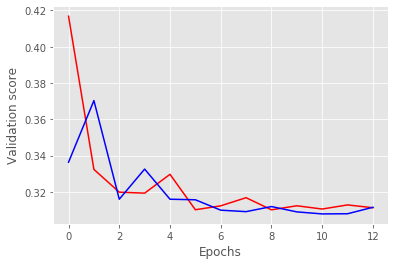

In [78]:
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [79]:
# ref - https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

y_pred = model_1.predict(Xtestlr, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(ytestlr, y_pred_bool))

1009/1009 [==============================] - 1s 944us/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     54940
           1       0.66      0.17      0.27      9625

    accuracy                           0.86     64565
   macro avg       0.77      0.58      0.60     64565
weighted avg       0.84      0.86      0.83     64565



In [80]:
y_pred_2 = model_2.predict(Xtestlr, batch_size=64, verbose=1)
y_pred_bool_2 = np.argmax(y_pred, axis=1)

print(classification_report(ytestlr, y_pred_bool_2))

1009/1009 [==============================] - 1s 926us/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     54940
           1       0.66      0.17      0.27      9625

    accuracy                           0.86     64565
   macro avg       0.77      0.58      0.60     64565
weighted avg       0.84      0.86      0.83     64565

